<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/xai_lime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import keras
import cv2
import matplotlib.pyplot as plt
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import Adam,SGD
from skimage.segmentation import mark_boundaries
from xml.etree import ElementTree

Using TensorFlow backend.


Model 23


In [4]:
saved_model = load_model('/content/drive/My Drive/xai_model/LG_model.h5')
#texture_model = load_model('/content/drive/My Drive/xai_model/texturenet.h5')














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
#saved_model.summary()

In [0]:
#texture_model.summary()

In [0]:
labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}
#labels = {0: 'Carpet', 1: 'Grid', 2:'Leather', 3:'Tile', 4:'Wood'}

In [0]:
annotation = '/content/drive/My Drive/NEU-DET/ANNOTATIONS/rolled-in_scale_53.xml'
image_path="/content/drive/My Drive/NEU surface defect database - test split/Test/RS/RS_53.bmp"

[4]
[[1.2830449e-08 6.2927988e-08 4.0658028e-09 4.8207698e-07 9.9999738e-01
  2.0814778e-06]]
Rolled-in Scale


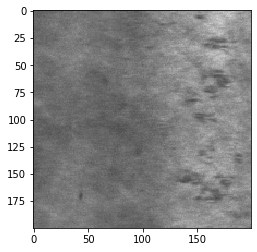

In [9]:
img = image.load_img(image_path, target_size=(200,200,3))
b_img = cv2.imread(image_path)
plt.grid(None)
plt.imshow(img)
plt.grid(None)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255
result = saved_model.predict(img)

prediction = result.argmax(axis=1)
print(prediction)
output = labels[int(prediction)]

print(result)
print(output)

In [0]:
# r = result*100
# names = ['Cr', 'In', 'PS', 'Pa', 'RS', 'Sc']
# values = [r[0][0], r[0][1], r[0][2], r[0][3], r[0][4], r[0][5]]

# plt.plot(names, values)
# plt.scatter(names, values)
# plt.bar(names, values)

In [11]:
def extract_boxes(filename):
	tree = ElementTree.parse(filename)
	root = tree.getroot()	
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	return boxes 

boxes = extract_boxes(annotation)
print(boxes)

[[130, 36, 187, 177], [117, 1, 194, 33]]


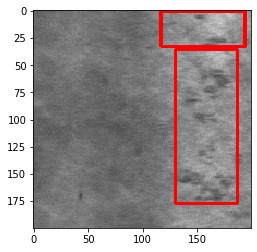

In [12]:
for i in range(len(boxes)):
  pt1 = boxes[i][0], boxes[i][1]
  pt2 = boxes[i][2], boxes[i][3]
  #print(pt1, pt2)
  cv2.rectangle(b_img, pt1, pt2, (255, 0, 0), 2)
  plt.imshow(b_img)

In [13]:
!pip install lime

     |████████████████████████████████| 276kB 3.5MB/s 
  Created wheel for lime: filename=lime-0.1.1.36-cp36-none-any.whl size=284191 sha256=c5453475dd0b836c8aa92ae800378cc48f391dd50f682e2cb273f48238fdc4d2
  Stored in directory: /root/.cache/pip/wheels/a9/2f/25/4b2127822af5761dab9a27be52e175105772aebbcbc484fb95
Successfully built lime


In [0]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [0]:
explainer = lime_image.LimeImageExplainer()

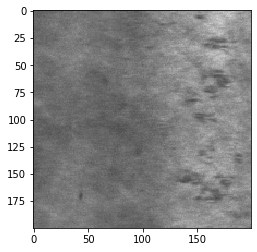

In [16]:
test_img = image.load_img(image_path)
plt.imshow(test_img)

test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img /= 255

In [17]:
%%time
# Hide color is the color for a superpixel turned OFF. 
# Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_img[0], saved_model.predict, top_labels=6, hide_color=0)

CPU times: user 3.05 s, sys: 376 ms, total: 3.43 s
Wall time: 3.29 s


In [18]:
labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'};
print("Predictions:")
for i in range(len(explanation.top_labels)):
  rank = explanation.top_labels[i]
  print(i,':',labels[rank])
  

Predictions:
0 : Rolled-in Scale
1 : Scratches
2 : Patches
3 : Inclusion
4 : Crazing
5 : Pitted Surface


labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}

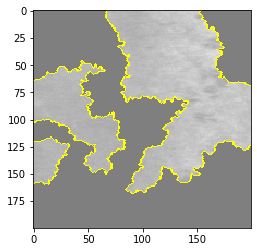

In [37]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

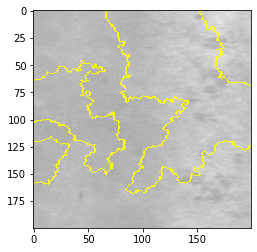

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
#plt.savefig('/content/drive/My Drive/XAI_results/LIME_Sc_15_2.jpg')

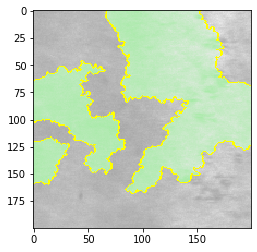

In [39]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
#plt.savefig('/content/drive/My Drive/XAI_results/LIME_Sc_15.jpg')

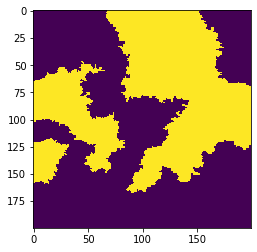

In [22]:
plt.imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


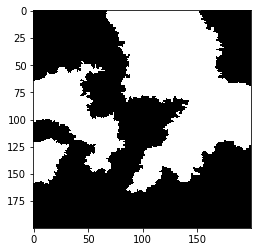

In [40]:
lime_mask = np.zeros(b_img.shape)
for i in range((test_img.shape)[1]):
  for j in range((test_img.shape)[2]):
    if mask[i][j] == 2:
      lime_mask[i][j] = 255
    else:
      lime_mask[i][j] = 0

plt.imshow(lime_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


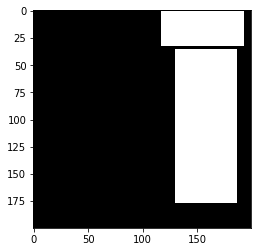

In [24]:
from xml.etree import ElementTree

def extract_boxes(filename):
	tree = ElementTree.parse(filename)
	root = tree.getroot()	
	boxes = list()
	for box in root.findall('.//bndbox'):
		xmin = int(box.find('xmin').text)
		ymin = int(box.find('ymin').text)
		xmax = int(box.find('xmax').text)
		ymax = int(box.find('ymax').text)
		coors = [xmin, ymin, xmax, ymax]
		boxes.append(coors)
	return boxes

boxes = extract_boxes(annotation)
# print(boxes)

gt_mask = np.zeros(b_img.shape)

for l in range(len(boxes)):
  for i in range(boxes[l][1], boxes[l][3]):
    for j in range(boxes[l][0], boxes[l][2]):
      gt_mask[i][j] = 255 

plt.imshow(gt_mask)

In [25]:
intersection = np.logical_and(gt_mask, lime_mask)
union = np.logical_or(gt_mask, lime_mask)
iou_score = np.sum(intersection) / np.sum(union)
print("LINE IOU: ",iou_score)

LINE IOU:  0.31471135940409684


In [0]:
# p = 0
# temp, mask = explanation.get_image_and_mask(explanation.top_labels[p], positive_only=False, 
#                                             num_features=10, hide_rest=False)
# top = labels[explanation.top_labels[p]]
# title = "Explanation for " + top

# plt.figure(figsize=(16, 16))
# plt.subplot(4,4,1)
# plt.imshow(test_img[0])
# plt.grid(None)
# plt.title('Input test image')
# plt.grid(None)

# plt.subplot(4,4,2)
# plt.imshow(b_img)
# plt.grid(None)
# plt.title('Ground truth annotation')
# plt.grid(None)

# plt.subplot(4,4,3)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title(title)
# plt.grid(None)

# plt.subplot(4,4,4)
# plt.imshow(mask)
# plt.grid(None)
# plt.title('Generated mask')
# plt.grid(None)

In [0]:

# temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, 
#                                             num_features=10, hide_rest=False)
# top = labels[explanation.top_labels[p]]
# title = "Explanation for " + top

# plt.figure(figsize=(16, 16))
# plt.subplot(4,4,1)
# plt.imshow(test_img[0])
# plt.grid(None)
# plt.title('Input test image')
# plt.grid(None)

# plt.subplot(4,4,2)
# plt.imshow(b_img)
# plt.grid(None)
# plt.title('Ground truth annotation')
# plt.grid(None)

# plt.subplot(4,4,3)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title(title)
# plt.grid(None)

# temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, 
#                                             num_features=10, hide_rest=False)

# plt.subplot(4,4,4)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title('Explanation for Rolled-in Scale')
# plt.grid(None)

# #plt.savefig('/content/drive/My Drive/XAI_results/LG_LIME_1.png')

In [0]:
# temp, mask = explanation.get_image_and_mask(explanation.top_labels[2], positive_only=False, 
#                                             num_features=10, hide_rest=False)

# plt.figure(figsize=(16, 16))
# plt.subplot(4,4,1)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title('Explanation for Inclusion')
# plt.grid(None)

# temp, mask = explanation.get_image_and_mask(explanation.top_labels[3], positive_only=False, 
#                                             num_features=10, hide_rest=False)
# plt.subplot(4,4,2)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title('Explanation for Patches')
# plt.grid(None)

# temp, mask = explanation.get_image_and_mask(explanation.top_labels[4], positive_only=False, 
#                                             num_features=10, hide_rest=False)
# plt.subplot(4,4,3)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title('Explanation for Crazing')
# plt.grid(None)

# temp, mask = explanation.get_image_and_mask(explanation.top_labels[5], positive_only=False, 
#                                             num_features=10, hide_rest=False)
# plt.subplot(4,4,4)
# plt.imshow(mark_boundaries(temp / 2 + 0.25, mask))
# plt.grid(None)
# plt.title('Explanation for Pitted Surface')
# plt.grid(None)

# #plt.savefig('/content/drive/My Drive/XAI_results/LG_LIME_2.png')

In [0]:
# import numpy as np
# import matplotlib.pyplot as plt
  
# N = 6
# menMeans = (270, 270, 270, 270, 270, 270)
# womenMeans = (30, 30, 30, 30, 30, 30)

# ind = np.arange(N)    
# width = 0.35

# p1 = plt.bar(ind, menMeans, width)
# p2 = plt.bar(ind, womenMeans, width, bottom=menMeans) 

# plt.ylabel('No. of images')
# plt.xlabel('Classes')
# plt.title('NEU dataset distribution')
# plt.xticks(ind, ('RS', 'Pa', 'Cr', 'PS', 'In', 'Sc'))
# plt.yticks(np.arange(0, 420, 30))
# plt.legend((p1[0], p2[0]), ('Train', 'Test'))

# plt.show()


# mIOU

In [0]:
!pip install lime

In [0]:
# NOTE: CHANGE INPUTS HERE

# x = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}
x = 3

In [0]:
path_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/Test/'

path_Cr = path_ROOT+'Cr'
path_In = path_ROOT+'In'
path_PS = path_ROOT+'PS'
path_Pa = path_ROOT+'Pa'
path_RS = path_ROOT+'RS'
path_Sc = path_ROOT+'Sc'

gt_path_ROOT = '/content/drive/My Drive/NEU surface defect database - test split/GT Test_2/'

gt_path_Cr = gt_path_ROOT+'Cr'
gt_path_In = gt_path_ROOT+'In'
gt_path_PS = gt_path_ROOT+'PS'
gt_path_Pa = gt_path_ROOT+'Pa'
gt_path_RS = gt_path_ROOT+'RS'
gt_path_Sc = gt_path_ROOT+'Sc'

In [0]:
test_path_list = [path_Cr, path_In, path_PS, path_Pa, path_RS, path_Sc]
gt_path_list = [gt_path_Cr, gt_path_In, gt_path_PS, gt_path_Pa, gt_path_RS, gt_path_Sc]

path = test_path_list[x]
# Idx = x
gt_path = gt_path_list[x]

In [0]:
test_files = []
for r, d, f in os.walk(path):
  for file in f:
    if '.bmp' in file:
      test_files.append(os.path.join(r, file))

gt_files = []
for r, d, f in os.walk(gt_path):
  for file in f:
    if '.bmp' in file:
      gt_files.append(os.path.join(r, file))

In [99]:
%load_ext autoreload
%autoreload 2

import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
%%time

labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}
intersection = []
union = []

for ttf in range(len(test_files)):
  pop = os.path.basename(test_files[ttf])
  for gtf in range(len(gt_files)):
    if pop in gt_files[gtf]:

      # print(test_files[ttf])
      lime_test = image.load_img(test_files[ttf])
      # b_img = cv2.imread(test_files[ttf])
      lime_test = image.img_to_array(lime_test)
      lime_test = np.expand_dims(lime_test, axis = 0)
      lime_test /= 255

      explanation = explainer.explain_instance(lime_test[0], saved_model.predict, top_labels=6, hide_color=0)
      
      # print("Predictions:")
      # for i in range(len(explanation.top_labels)):
      #   rank = explanation.top_labels[i]
      #   print(i,':',labels[rank])

      temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
      # plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
      
      lime_mask = np.zeros(lime_test.shape[1:])
      for i in range((lime_test.shape)[1]):
        for j in range((lime_test.shape)[2]):
          if mask[i][j] == 2:
            lime_mask[i][j] = 255
          else:
            lime_mask[i][j] = 0
      # plt.imshow(lime_mask)

      # print(gt_files[gtf])
      grnd_truth = image.load_img(gt_files[gtf])  
      grnd_truth = image.img_to_array(grnd_truth)

      intrxn = np.logical_and(grnd_truth, lime_mask)
      intersection.append(intrxn)

      unn = np.logical_or(grnd_truth,lime_mask)
      union.append(unn)

miou_score = np.sum(intersection) / np.sum(union)
print("mIOU : ",miou_score)

mIOU :  0.221582018692723
CPU times: user 1min 34s, sys: 12.2 s, total: 1min 46s
Wall time: 1min 39s



#mIOU for SHAP:

Crazing : 0.28

Inclusion : 0.2022

Pitted Surface : 0.1746

Patches : 0.2285

Rolled-in Scale : 0.1781

Scratches : 0.2248